In [1]:
import requests 
url = "https://api.binance.com/api/v3/ticker/price?symbol=ETHUSDT"
response = requests.get(url)
symbols = response.json()
print(symbols)

{'symbol': 'ETHUSDT', 'price': '4609.91000000'}


In [9]:
import requests

coins = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT']
new_coins = []

for symbol in coins:
    api = f"https://api.binance.com/api/v3/ticker/price?symbol={symbol}"
    response = requests.get(api)
    data = response.json()
    new_coins.append(data)

print(new_coins)

[{'symbol': 'BTCUSDT', 'price': '111570.00000000'}, {'symbol': 'ETHUSDT', 'price': '4594.59000000'}, {'symbol': 'SOLUSDT', 'price': '198.78000000'}]


In [10]:
new_coins.sort(key=lambda x: float(x['price']), reverse=True)

In [11]:
new_coins[0]['price']

'111570.00000000'

In [ ]:
new_data= [{'coin_name':new_coins[i]['symbol'], 'price':new_coins[i]['price']} for i in range(len(new_coins))]

In [13]:
import pandas as pd

df = pd.DataFrame(new_coins)
print(df)

    symbol            price
0  BTCUSDT  111570.00000000
1  ETHUSDT    4594.59000000
2  SOLUSDT     198.78000000


In [14]:
df['price'] = df['price'].astype(float)
df = df.sort_values(by='price', ascending=False)

In [15]:
import requests
import pandas as pd
from datetime import datetime

coins = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT']
new_coins = []

for symbol in coins:
    api = f"https://api.binance.com/api/v3/ticker/price?symbol={symbol}"
    response = requests.get(api)
    data = response.json()
    data['timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    new_coins.append(data)

df = pd.DataFrame(new_coins)
df['price'] = df['price'].astype(float)
print(df)

    symbol      price            timestamp
0  BTCUSDT  111677.44  2025-08-25 12:46:47
1  ETHUSDT    4606.04  2025-08-25 12:46:47
2  SOLUSDT     199.12  2025-08-25 12:46:47


Matplotlib is building the font cache; this may take a moment.


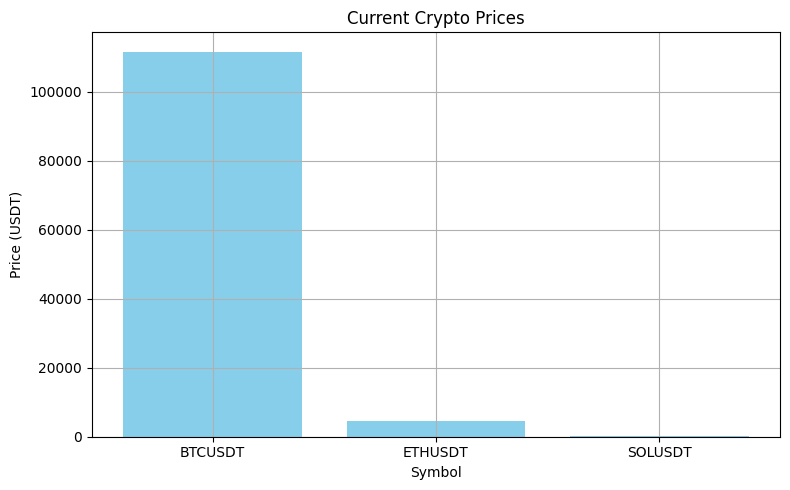

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df['symbol'], df['price'], color='skyblue')
plt.title('Current Crypto Prices')
plt.xlabel('Symbol')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.tight_layout()
plt.show()